In [239]:
import pandas as pd
import numpy as np
import scipy as sp

In [240]:
%run -i ../household_expenditure_pca/utils/plotting.py

# Loading The data set

In [241]:
!make --directory="../" data

make: Entering directory '/home/josef/test/household_expenditure_pca'
python household_expenditure_pca/dataset.py
2025-02-22 17:46:00.835 | INFO     | config:<module>:11 - PROJ_ROOT path is: /home/josef/test/household_expenditure_pca
2025-02-22 17:46:00.847 | INFO     | __main__:main:17 - Fetching Hugging Face dataset 'CODE-BLOCK/Weekly_household_expenditure'...
2025-02-22 17:46:05.482 | SUCCESS  | __main__:main:22 - Downloading dataset complete.
2025-02-22 17:46:05.482 | INFO     | __main__:main:23 - You can find the data set in /home/josef/test/household_expenditure_pca/data/raw/dataset.csv
make: Leaving directory '/home/josef/test/household_expenditure_pca'


In [242]:
df = pd.read_csv("../data/raw/dataset.csv")
df.set_index(df.columns[0], inplace=True)
df.index.name = None
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Household_Weekly_Expenditure    3362 non-null   object 
 1   Monthly_Household_Income        3536 non-null   object 
 2   Number_of_Household_Dependents  3537 non-null   float64
 3   Age_of_Head_of_Household        3609 non-null   float64
 4   Household_Size                  3606 non-null   float64
 5   Education_Level                 3611 non-null   object 
 6   Employment_Status               3613 non-null   object 
 7   Location                        3606 non-null   object 
 8   Savings_Rate                    3612 non-null   float64
 9   Weekly_Savings                  3610 non-null   float64
 10  Monthly_Rent                    3610 non-null   object 
 11  Loan_Repayment                  3611 non-null   float64
 12  Transport_Expenses              3610 no

In [243]:
df

,Household_Weekly_Expenditure,Monthly_Household_Income,Number_of_Household_Dependents,Age_of_Head_of_Household,Household_Size,Education_Level,Employment_Status,Location,Savings_Rate,Weekly_Savings,Monthly_Rent,Loan_Repayment,Transport_Expenses,Utility_Bills
0,NaN,NaN,5.0,38.0,7.0,High School,Unemployed,Urban,0.26,376.26,"1,790.00",404.60,131.17,193.06
1,553.82,"4,958.45",3.0,59.0,NaN,Master's,Employed,Suburban,0.29,351.83,"1,408.59",492.12,296.12,269.79
2,710.45,"6,459.93",6.0,53.0,8.0,Master's,Employed,Urban,0.29,431.85,NaN,549.64,NaN,240.01
3,639.76,"6,871.41",3.0,36.0,5.0,Doctorate,Unemployed,Suburban,0.26,480.82,862.12,239.42,61.83,306.85
4,473.14,"4,783.66",7.0,42.0,9.0,NaN,Employed,Suburban,0.05,61.29,"1,602.23",378.17,61.25,374.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,548.94,"5,265.78",2.0,62.0,4.0,Bachelor's,Employed,Suburban,0.23,286.11,NaN,NaN,180.66,352.71
3996,294.54,"2,291.26",4.0,NaN,6.0,Bachelor's,Employed,Suburban,0.27,125.86,NaN,860.45,299.03,210.54
3997,406.19,"4,579.98",4.0,45.0,6.0,High School,Employed,Urban,0.06,69.61,"1,005.21",220.48,141.07,203.73
3998,787.65,"7,630.61",NaN,65.0,6.0,High School,Employed,Suburban,0.23,429.63,"1,692.71",29.03,89.21,361.91


# Checking For Duplicated Rows

In [244]:
df.duplicated().sum()

np.int64(0)

# Checking For Null Values

In [245]:
df.isna().sum()

Household_Weekly_Expenditure      638
Monthly_Household_Income          464
Number_of_Household_Dependents    463
Age_of_Head_of_Household          391
Household_Size                    394
Education_Level                   389
Employment_Status                 387
Location                          394
Savings_Rate                      388
Weekly_Savings                    390
Monthly_Rent                      390
Loan_Repayment                    389
Transport_Expenses                390
Utility_Bills                     391
dtype: int64

# Treating Null Values

In [248]:
def fill_na_values(df):
    num_cols=df.select_dtypes(include="float64").columns
    cat_cols=df.select_dtypes(include="object").columns
    for col in num_cols:
        df.loc[:,col] = df.loc[:,col].fillna(df[col].mean())
    for col in cat_cols:
        mode_value = df[col].mode()[0]
        df.loc[:,col] = df.loc[:,col].fillna(mode_value)

In [249]:
fill_na_values(df)

In [ ]:
df.isna().sum()

Household_Weekly_Expenditure      0
Monthly_Household_Income          0
Number_of_Household_Dependents    0
Age_of_Head_of_Household          0
Household_Size                    0
Education_Level                   0
Employment_Status                 0
Location                          0
Savings_Rate                      0
Weekly_Savings                    0
Monthly_Rent                      0
Loan_Repayment                    0
Transport_Expenses                0
Utility_Bills                     0
dtype: int64

In [ ]:
df.head()

,Household_Weekly_Expenditure,Monthly_Household_Income,Number_of_Household_Dependents,Age_of_Head_of_Household,Household_Size,Education_Level,Employment_Status,Location,Savings_Rate,Weekly_Savings,Monthly_Rent,Loan_Repayment,Transport_Expenses,Utility_Bills
0,391.15,"1,000.00",5.0,38.0,7.000000,High School,Unemployed,Urban,0.26,376.26,"1,790.00",404.60,131.170000,193.06
1,553.82,"4,958.45",3.0,59.0,6.037438,Master's,Employed,Suburban,0.29,351.83,"1,408.59",492.12,296.120000,269.79
2,710.45,"6,459.93",6.0,53.0,8.000000,Master's,Employed,Urban,0.29,431.85,"1,000.42",549.64,174.825609,240.01
3,639.76,"6,871.41",3.0,36.0,5.000000,Doctorate,Unemployed,Suburban,0.26,480.82,862.12,239.42,61.830000,306.85
4,473.14,"4,783.66",7.0,42.0,9.000000,Bachelor's,Employed,Suburban,0.05,61.29,"1,602.23",378.17,61.250000,374.29


# Analysing General Dataset Statistics

In [ ]:
df.describe()

,Number_of_Household_Dependents,Age_of_Head_of_Household,Household_Size,Savings_Rate,Weekly_Savings,Loan_Repayment,Transport_Expenses,Utility_Bills
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.036472,46.839568,6.037438,0.172885,217.848072,496.405658,174.825609,249.567941
std,1.880547,12.382179,1.896282,0.068026,109.847250,272.667247,68.982182,81.907649
min,1.000000,25.000000,3.000000,0.050000,9.210000,0.180000,50.150000,100.010000
25%,2.000000,37.000000,4.000000,0.120000,134.655000,271.325000,119.010000,183.125000
50%,4.036472,46.839568,6.000000,0.172885,217.844036,496.405658,174.825609,249.567941
75%,6.000000,57.000000,8.000000,0.230000,279.877500,718.252500,231.670000,314.880000
max,7.000000,69.000000,9.000000,0.300000,699.940000,999.270000,299.970000,399.990000


# Checking Column distributions 

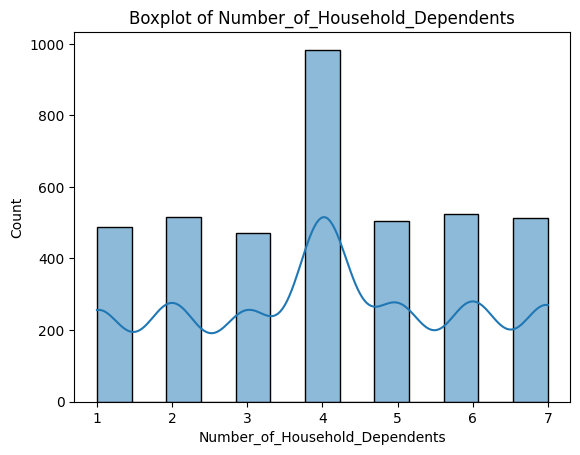

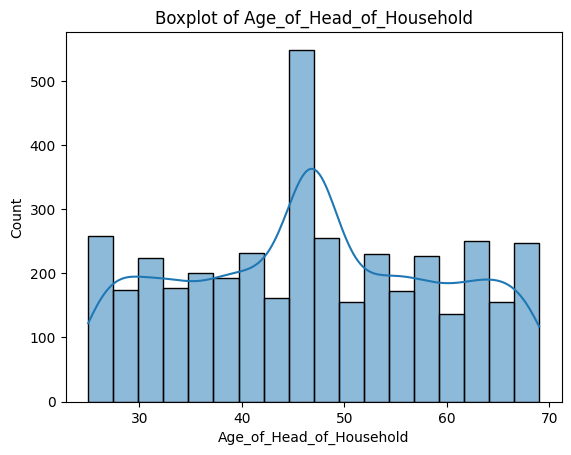

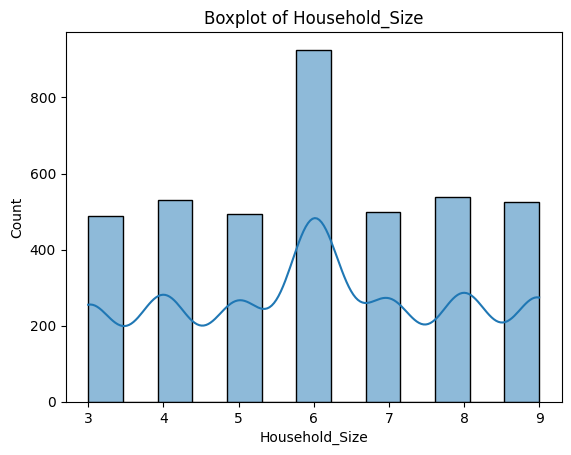

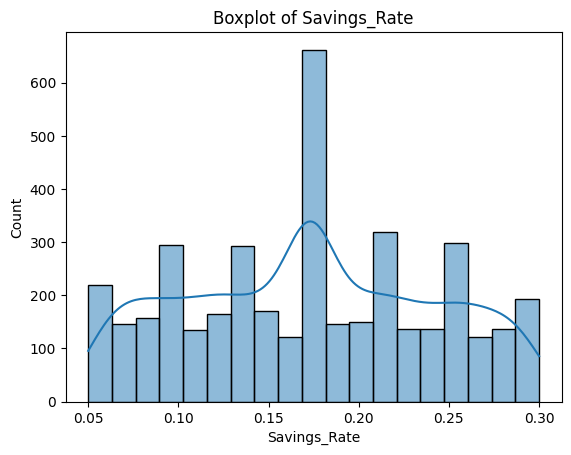

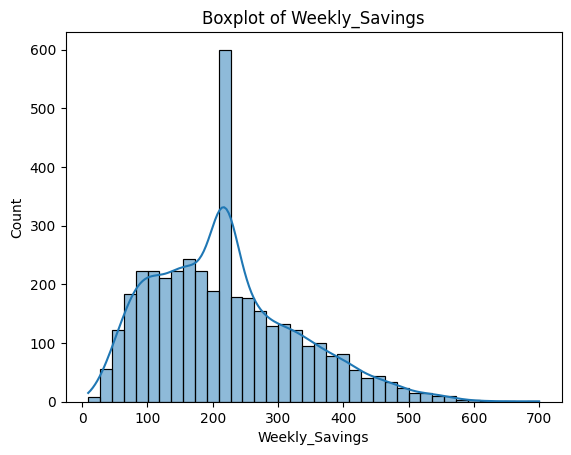

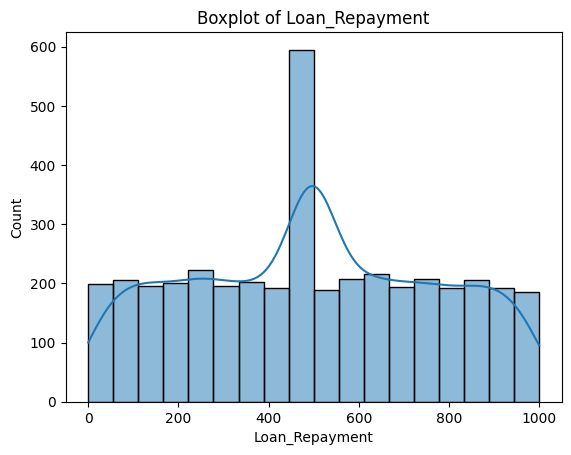

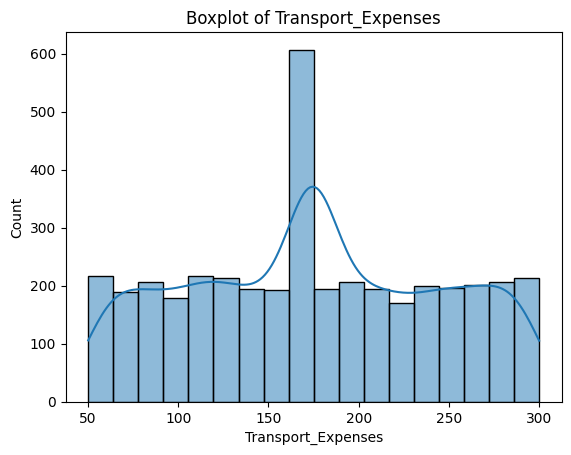

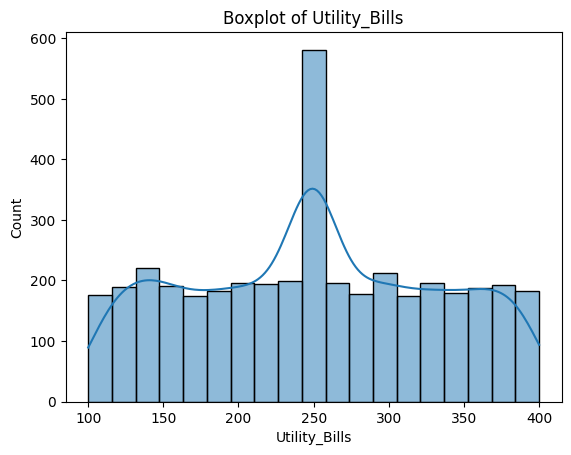

In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    distribution_plot(df,col)

# Checking Column Outlier values

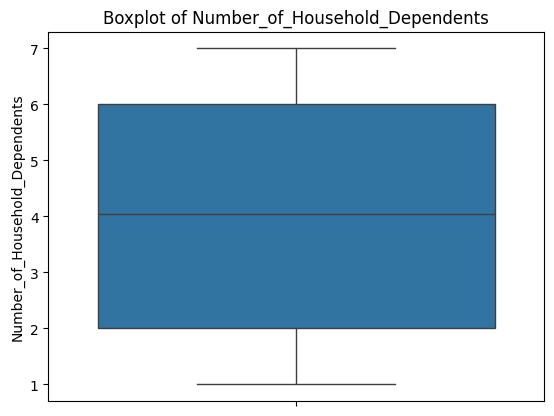

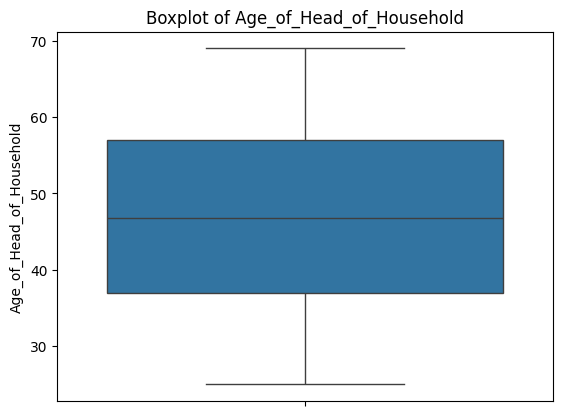

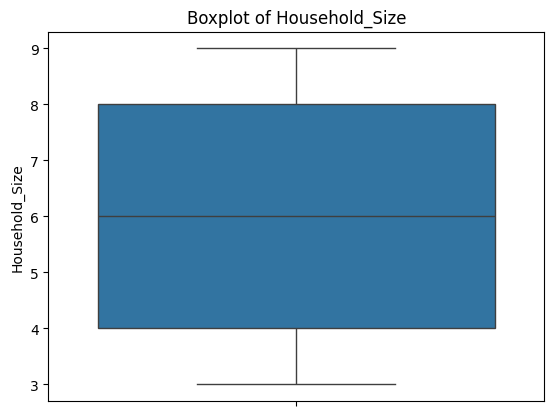

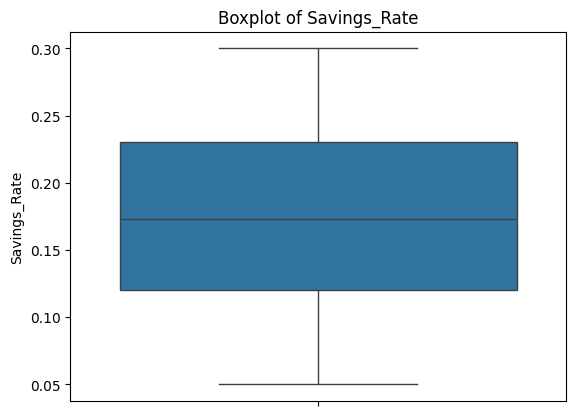

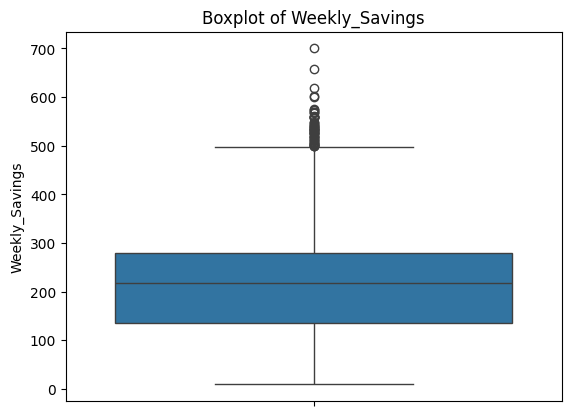

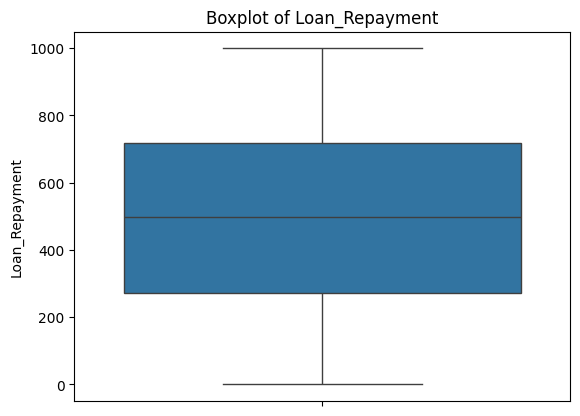

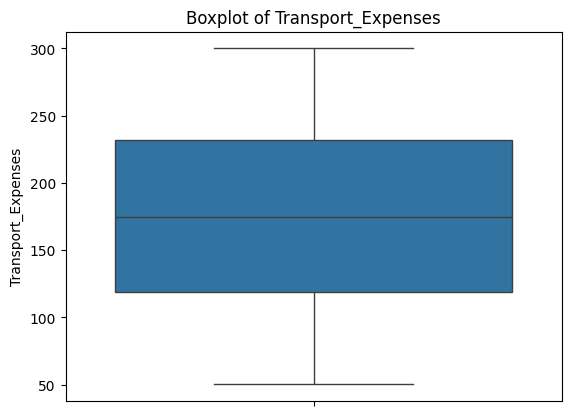

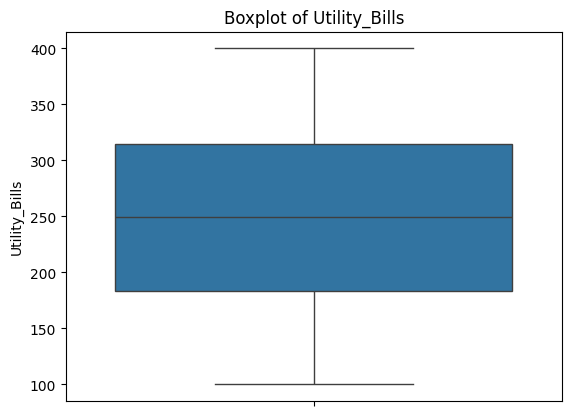

In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outlier_check(df,col)

## Outliers detected in "weekly_savings" Column, we handle them using IQR Method:

In [ ]:
Q1 = df['Weekly_Savings'].quantile(0.25)
Q3 = df['Weekly_Savings'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['Weekly_Savings'] >= lower_bound) & (df['Weekly_Savings'] <= upper_bound)]

<function __main__.plot(x, y)>

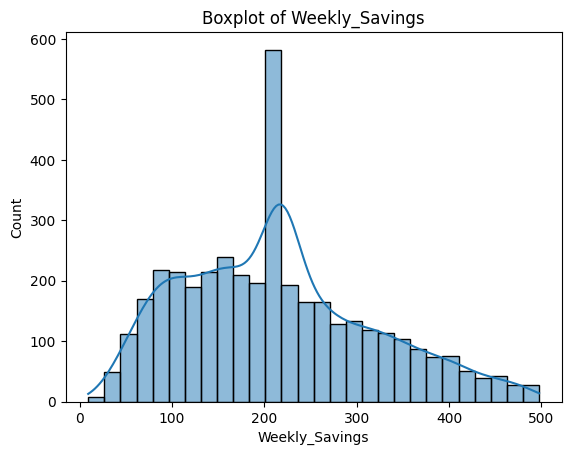

In [ ]:
distribution_plot(df,'Weekly_Savings')

<Axes: title={'center': 'Boxplot of Weekly_Savings'}, ylabel='Weekly_Savings'>

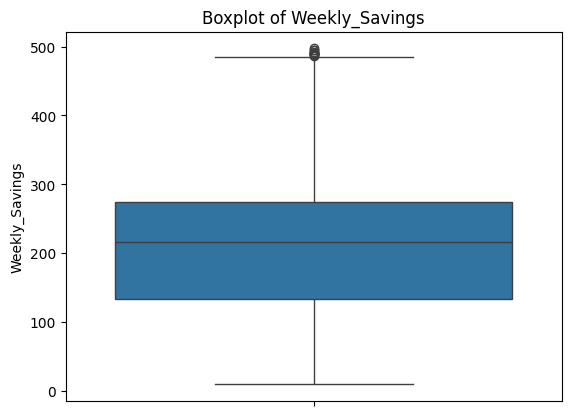

In [ ]:
outlier_check(df,'Weekly_Savings')

# Checking Correlation between features

<Axes: title={'center': 'Correlation Matrix'}>

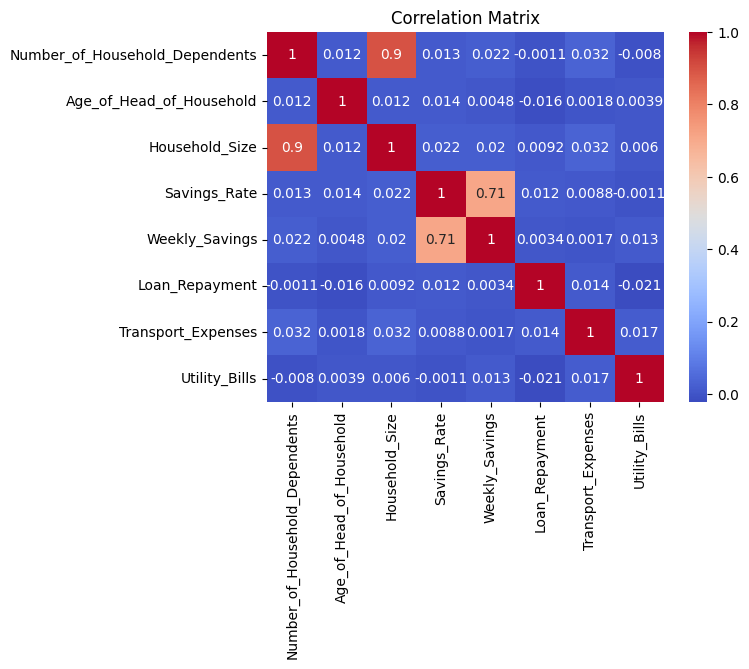

In [ ]:
correlation_analytics(df.select_dtypes(include="float64"))

# Key Findings
1. Data Cleaning & Preprocessing

    Duplicates: No duplicate rows were found in the dataset.
    Missing Values:
        -Numerical columns were filled using the mean of the respective column.
        -Categorical columns were filled using the mode of the respective column.

2. Statistical Summary

    A summary of the numerical columns was generated using .describe(), providing key statistics such as mean, median, min, max, and quartiles.
    The dataset shows a wide range of values across features, indicating variability.

3. Distribution Analysis

    Visualizations: Histograms and KDE plots were used to inspect the distribution of numerical features.
    Key Observations:
        Weekly Savings: The distribution was right-skewed, indicating that a majority of individuals save a smaller amount per week, with a few high-saving outliers.
        Other numerical columns also exhibited varying degrees of skewness.

4. Outlier Detection & Handling

    Detected Outliers:
        The Weekly Savings column had significant outliers beyond the upper whisker in the boxplot.
        These outliers were handled using the Interquartile Range (IQR) method.
        Post-removal, a reduction in extreme values was observed in the revised boxplot and histogram.

5. Correlation Analysis

    A correlation matrix was generated to identify relationships between variables.
    Some strong correlations were noted between savings and other financial attributes.